In [52]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import AllChem
from rdkit.Chem import rdchem
from IPython.display import Image
from pathlib import Path
import nglview 
from ipywidgets import interactive, VBox


# 4FU9: Input PDB Structure

In [53]:
view1 = nglview.show_pdbid("4fu9") 
view1

NGLWidget()

In [54]:
view1.render_image()


Image(value=b'', width='99%')

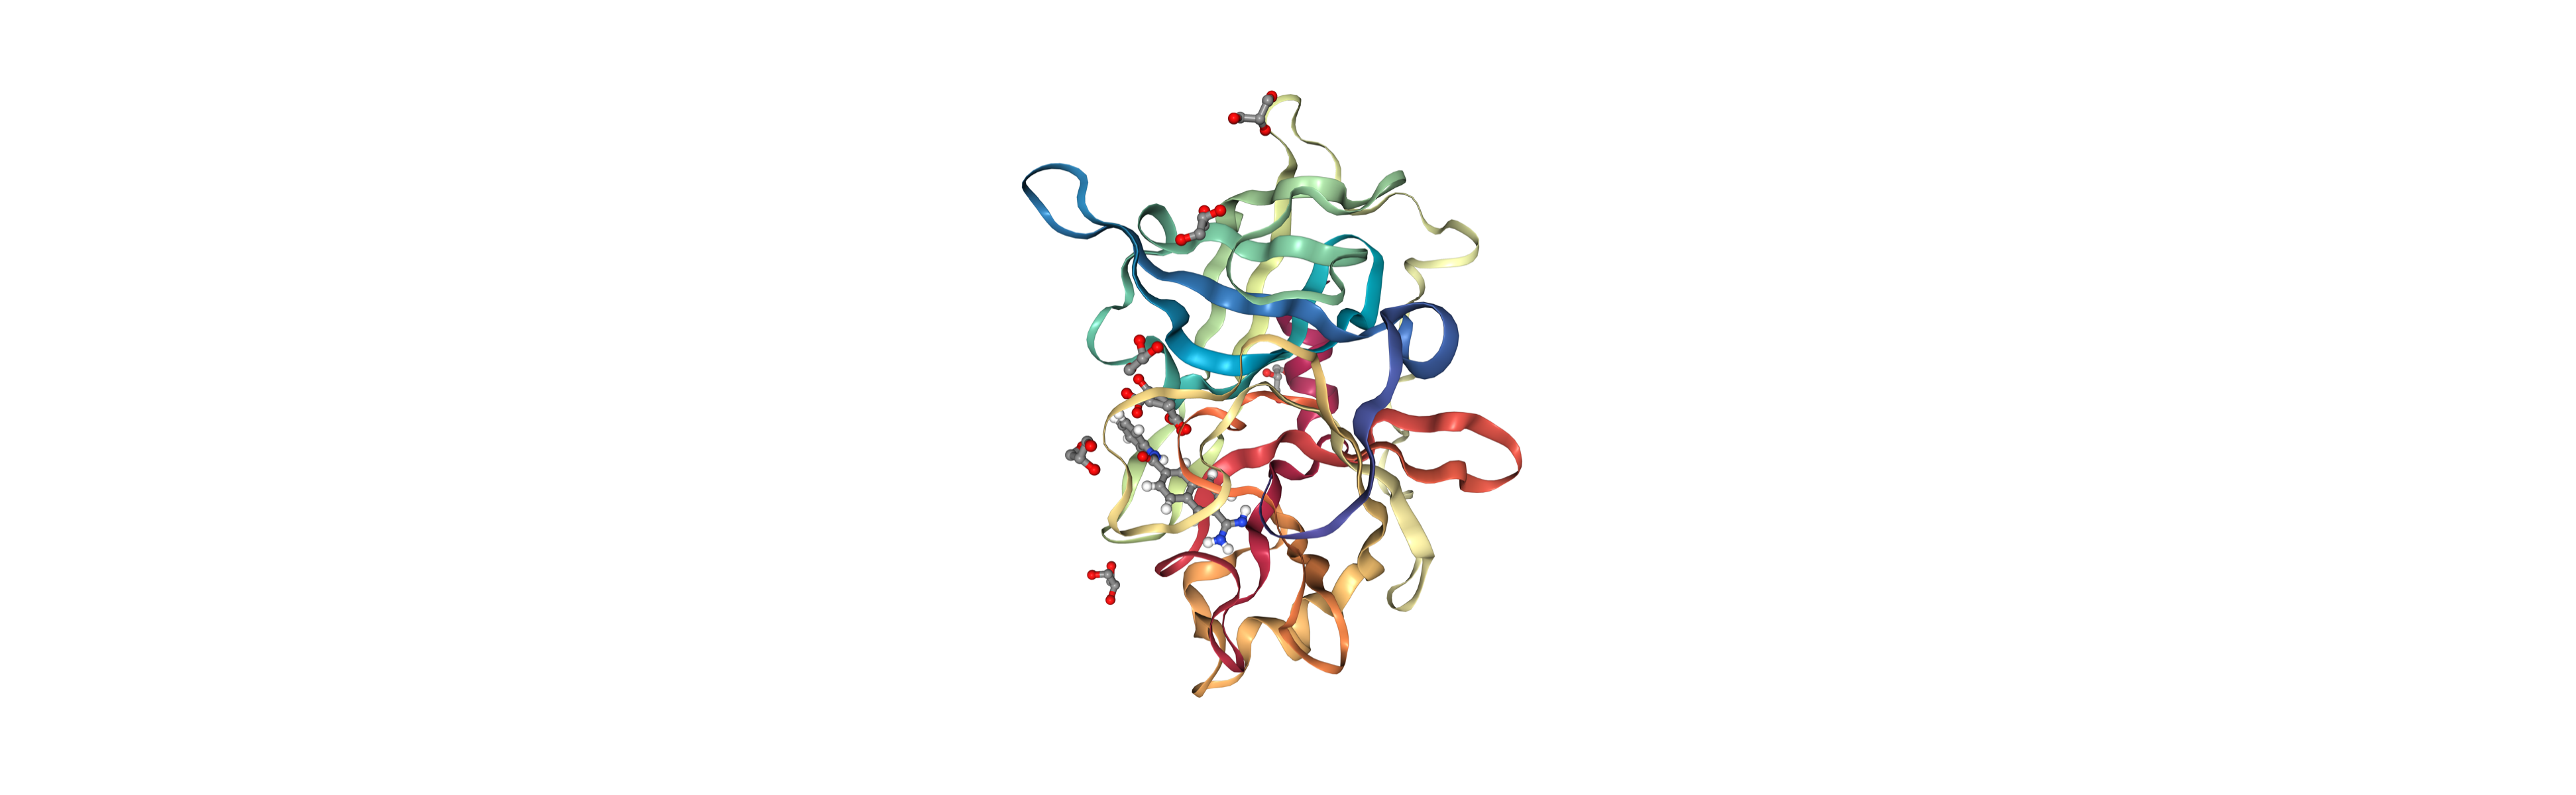

In [55]:
view1._display_image()


## Processed Structure with Maestro Preparation Wizard

In [60]:
m = Chem.MolFromPDBFile("4fu9.pdb")
view = nglview.show_rdkit(m)
view

NGLWidget()

In [61]:
view.render_image()


Image(value=b'', width='99%')

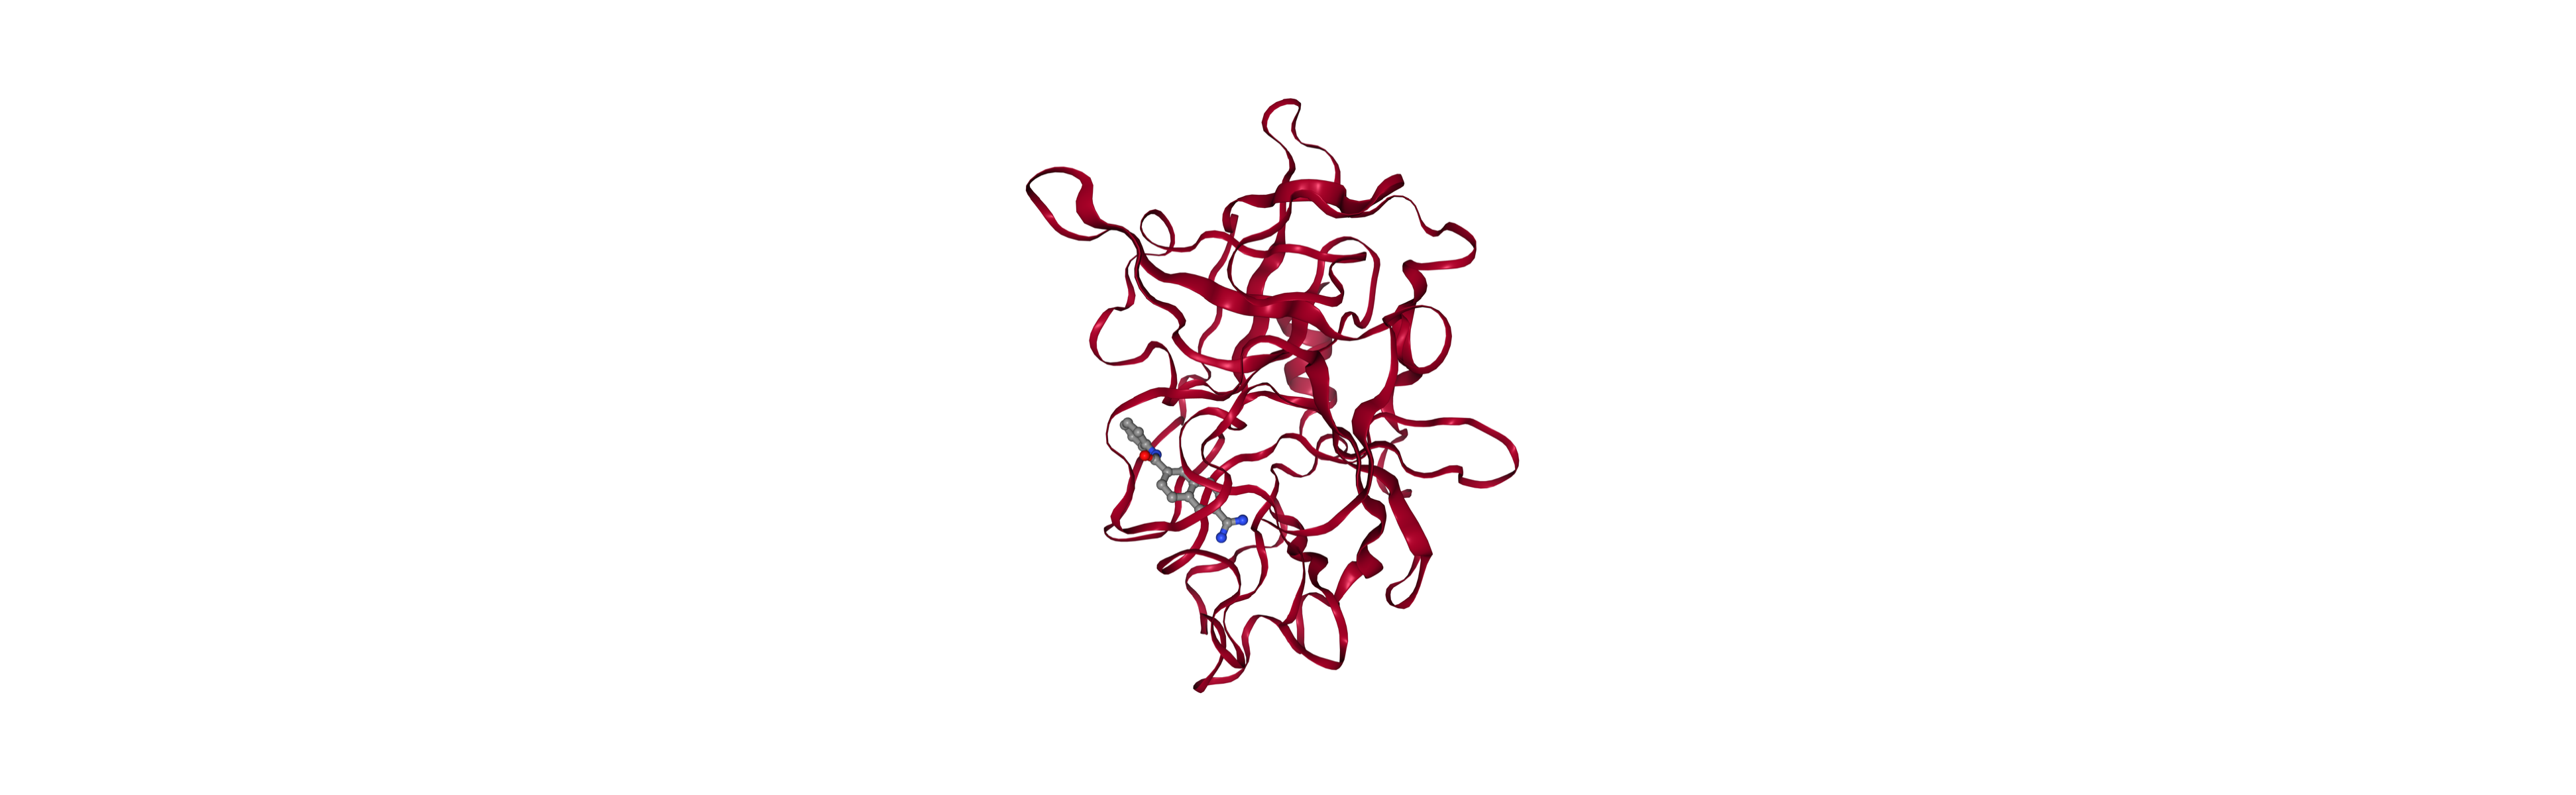

In [62]:
view._display_image()


## Ligands

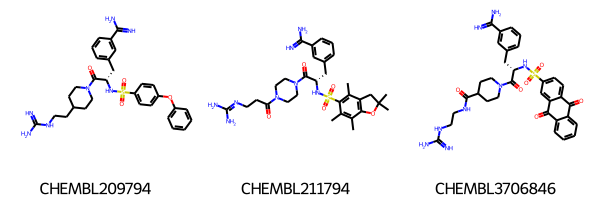

In [63]:
lig1 = Chem.MolFromSmiles("N=C(N)NCCC1CCN(C(=O)[C@H](Cc2cccc(C(=N)N)c2)NS(=O)(=O)c2ccc(Oc3ccccc3)cc2)CC1")
lig2 = Chem.MolFromSmiles("Cc1c(C)c(S(=O)(=O)N[C@@H](Cc2cccc(C(=N)N)c2)C(=O)N2CCN(C(=O)CCN=C(N)N)CC2)c(C)c2c1OC(C)(C)C2")
lig3 = Chem.MolFromSmiles("N=C(N)NCCNC(=O)C1CCN(C(=O)[C@H](Cc2cccc(C(=N)N)c2)NS(=O)(=O)c2ccc3c(c2)C(=O)c2ccccc2C3=O)CC1")

img = Draw.MolsToGridImage( [lig1,lig2,lig3], molsPerRow=3, useSVG=True, legends=["CHEMBL209794","CHEMBL211794","CHEMBL3706846"] )
img

LigPrep Parameters Used


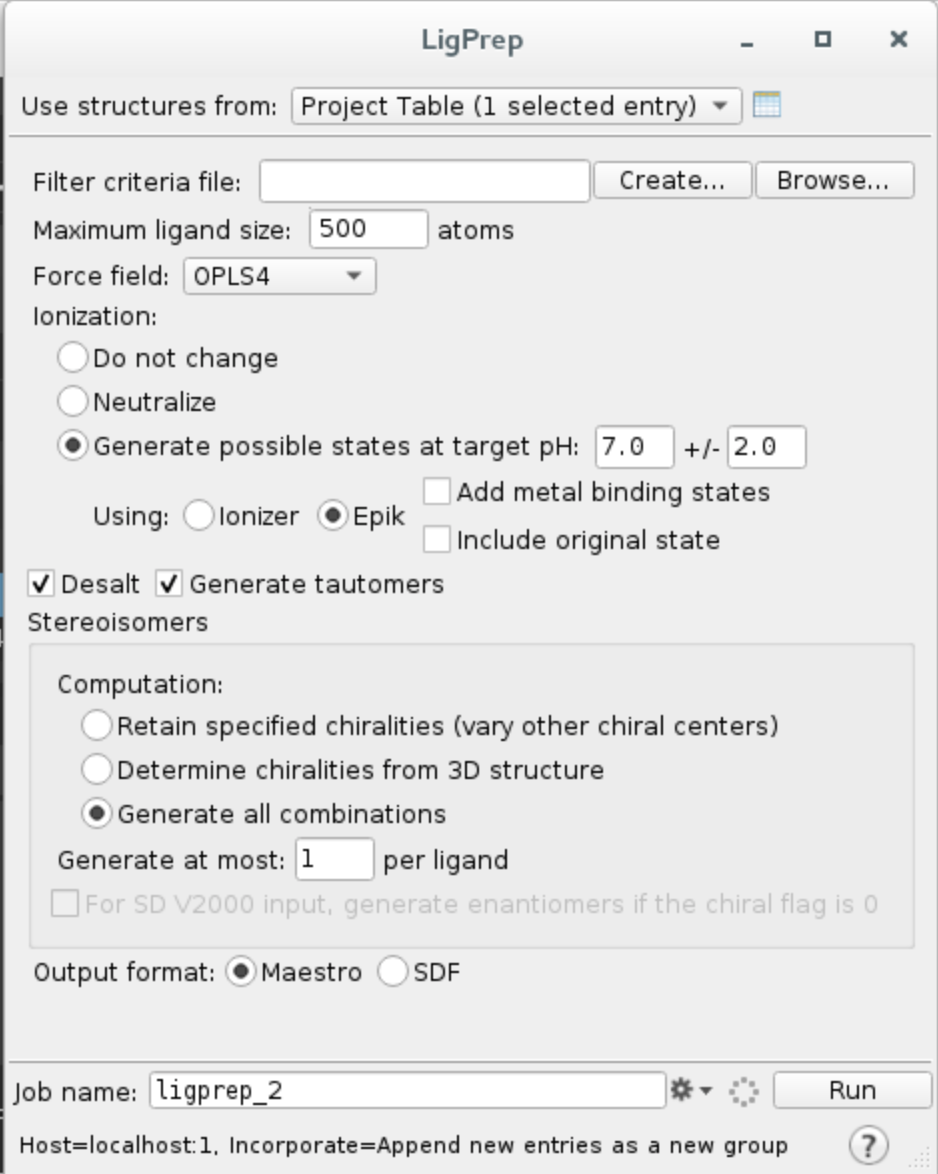

In [64]:
print("LigPrep Parameters Used")
Image( "../img_results/ligprep_conf.png", width=400)

# CHEMBL209794

## LigPrep Result

In [65]:
m = Chem.MolFromPDBFile("lig_set/CHEMBL209794/LIG_Pele/input/ligand.pdb")
_ = AllChem.EmbedMultipleConfs(m, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
view2 = nglview.show_rdkit(m)
view2

[11:14:38] Molecule does not have explicit Hs. Consider calling AddHs()
RDKit WARNING: [11:14:38] Molecule does not have explicit Hs. Consider calling AddHs()
[11:14:38] UFFTYPER: Unrecognized atom type: S_5+4 (17)
RDKit ERROR: [11:14:38] UFFTYPER: Unrecognized atom type: S_5+4 (17)


NGLWidget()

In [66]:
view2.render_image()


Image(value=b'', width='99%')

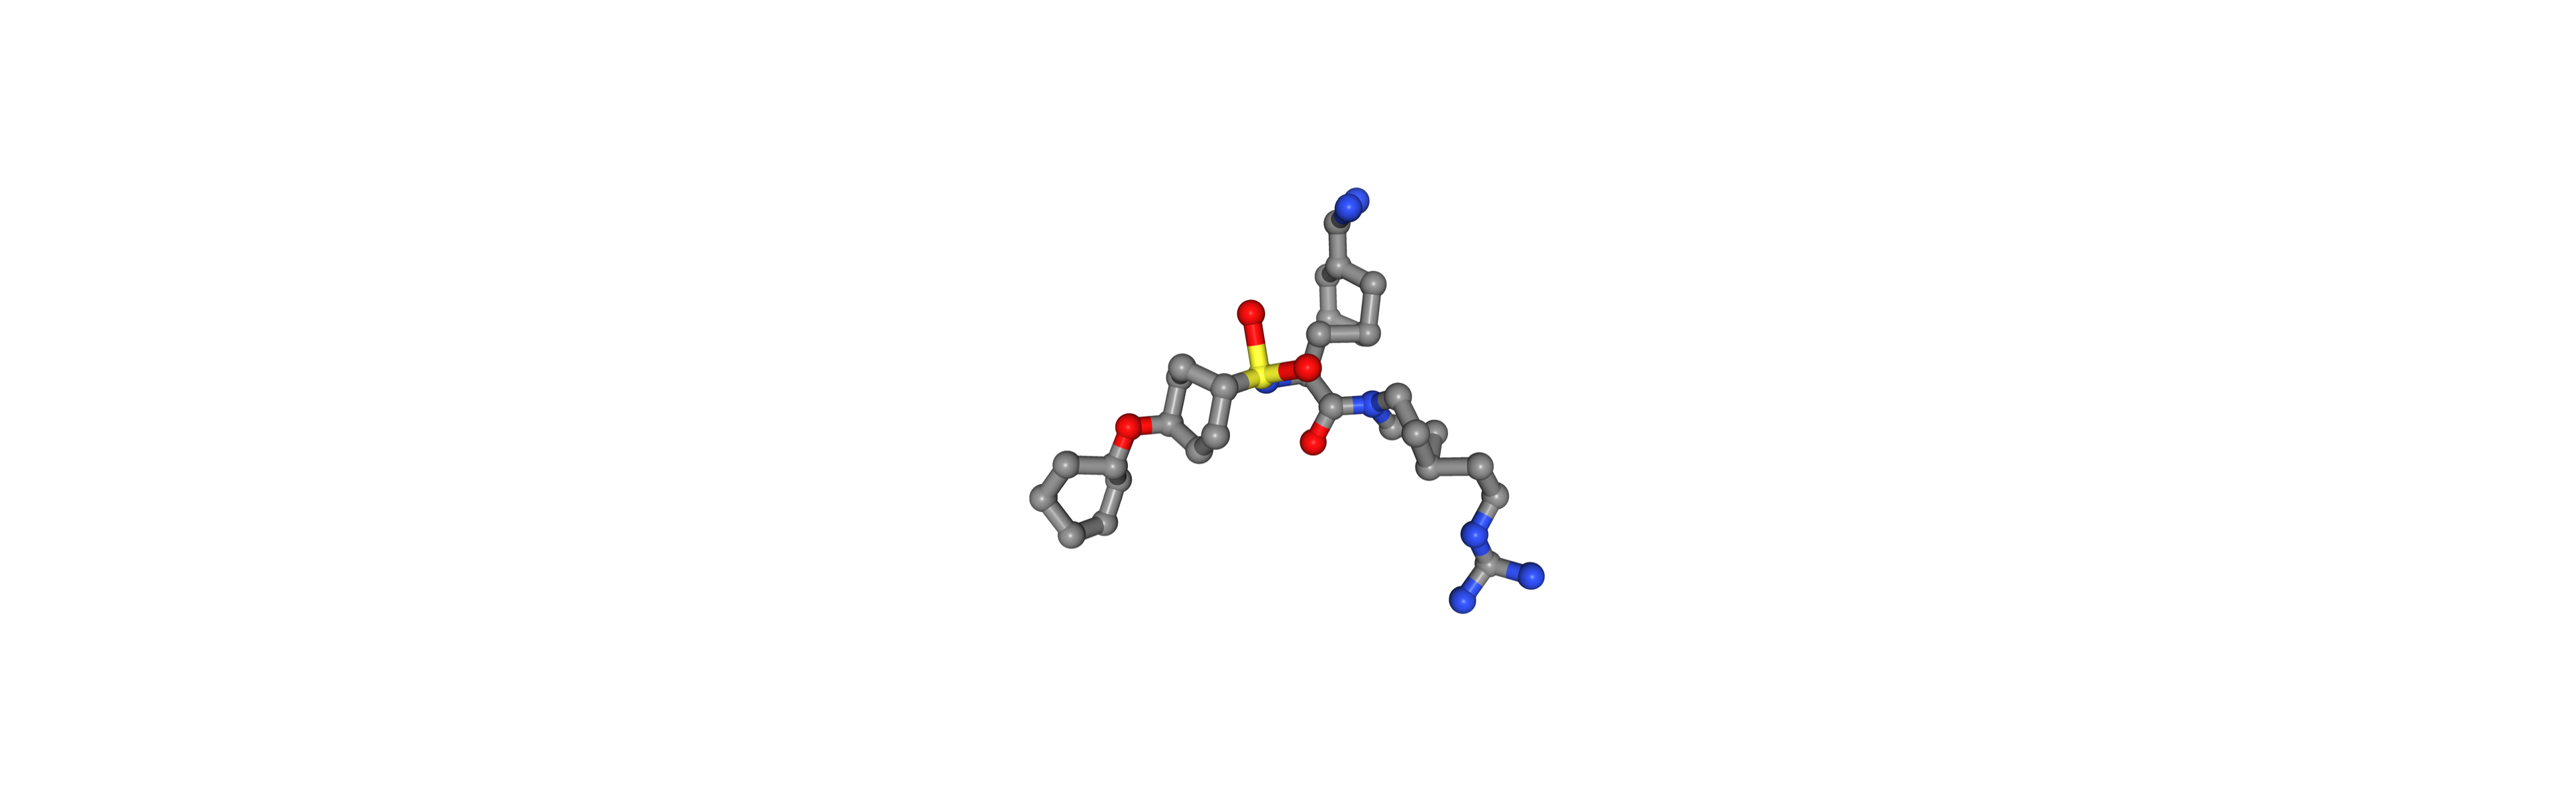

In [67]:
view2._display_image()


## Glide Results

In [68]:
m = Chem.MolFromPDBFile("1_glide.pdb")
view = nglview.show_rdkit(m)
print("Result #1")
print("Docking Score: -4.181")
view

Result #1
Docking Score: -4.181


NGLWidget()

In [69]:
view.render_image()


Image(value=b'', width='99%')

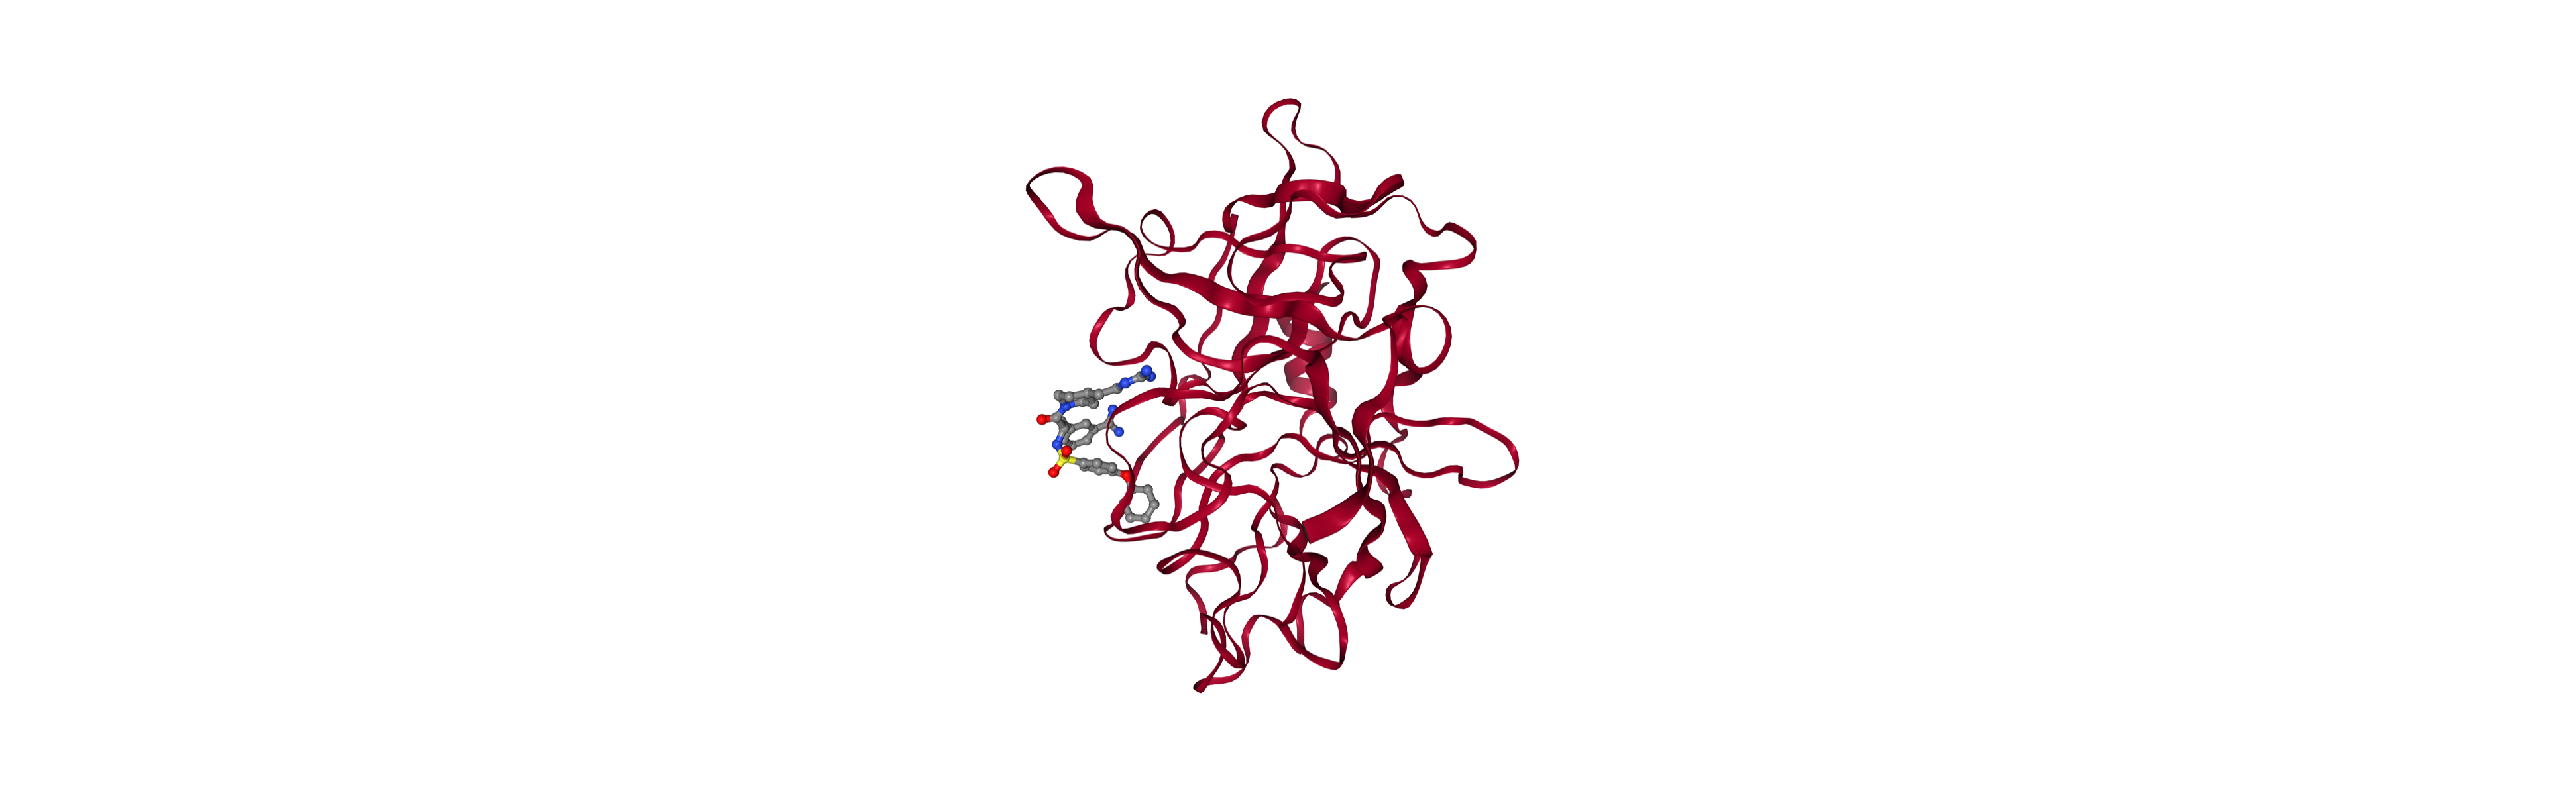

In [70]:
view._display_image()


In [71]:
m = Chem.MolFromPDBFile("2_glide.pdb")
view = nglview.show_rdkit(m)
print("Result #2")
print("Docking Score: -3.747")
view

Result #2
Docking Score: -3.747


NGLWidget()

In [72]:
view.render_image()


Image(value=b'', width='99%')

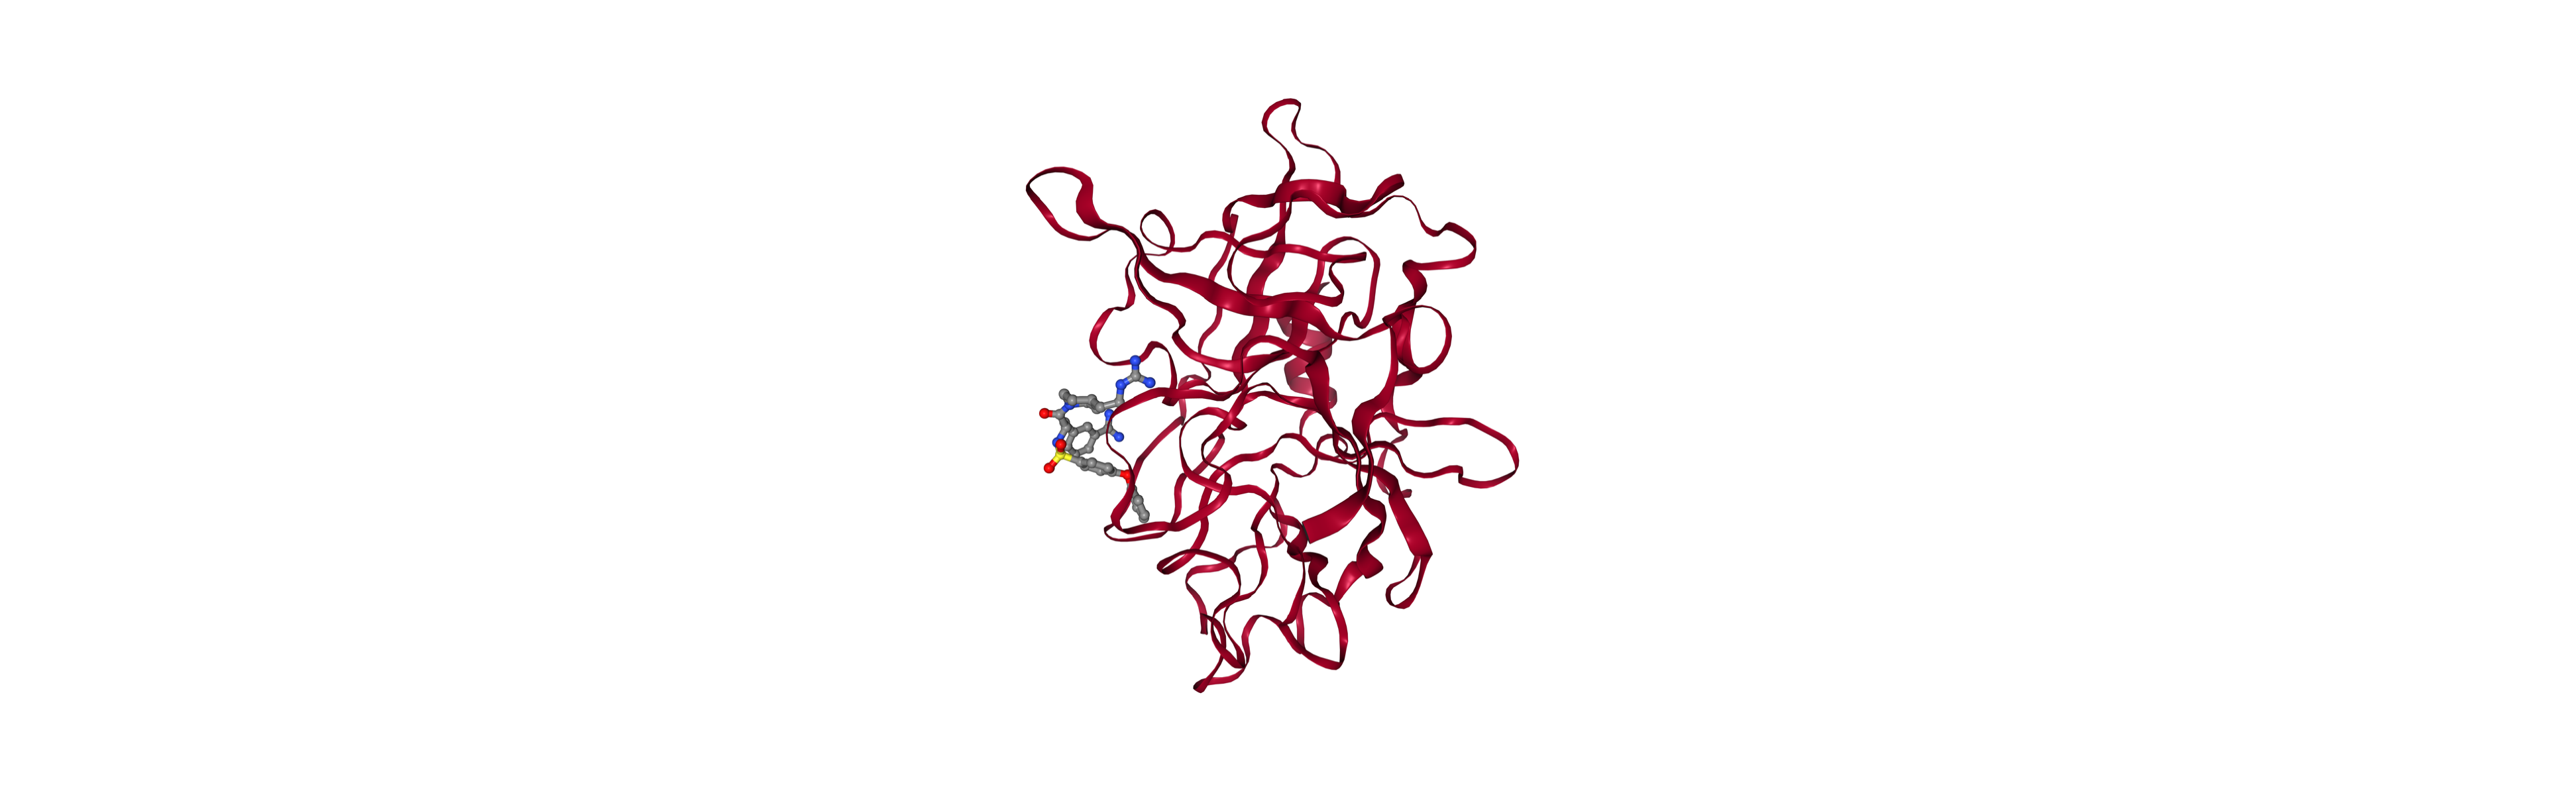

In [73]:
view._display_image()


In [74]:
m = Chem.MolFromPDBFile("3_glide.pdb")
view = nglview.show_rdkit(m)
print("Result #3")
print("Docking Score: -3.508")
view

Result #3
Docking Score: -3.508


NGLWidget()

In [75]:
view.render_image()


Image(value=b'', width='99%')

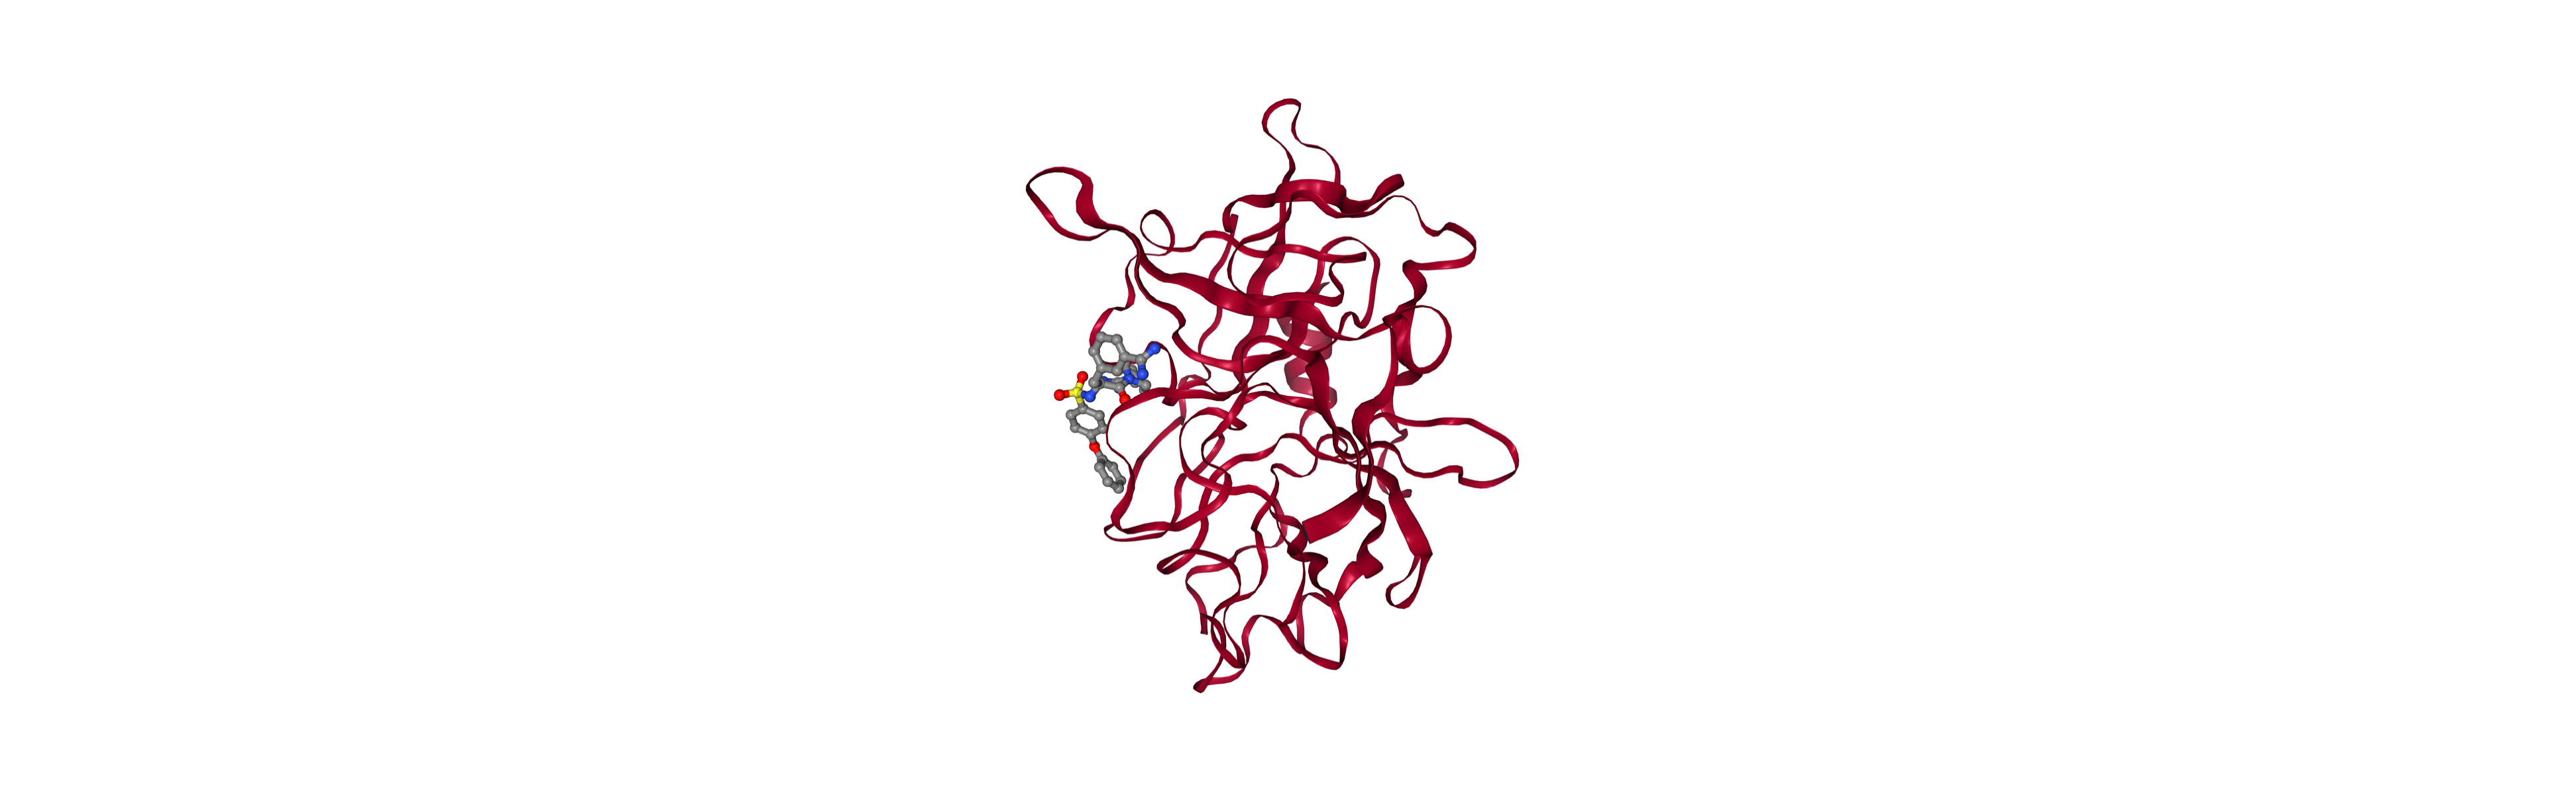

In [76]:
view._display_image()


**ATENTION:** The flag **rmsd_pdb** does not point to the crystal structure because when doing so, we obtained the following error: 


In [77]:
'''
!!!!
terminate called after throwing an instance of 'PeleBuildException'
  what():  /!\ Error in MacroBuilder::createMacro: /!\ Error in RmsdBuilder::checkSelectionAndSuperpositionAtomSizes: Trying to create an RMSD metric with an empty set of atoms in the native structure. Configuration was: {
        "Native" :
        {
                "path" : "/shared/home/hmartin/PeleAI/URO/rmsd_no_at/lig_set/4fu9.pdb"
        },
        "doSuperposition" : false,
        "includeHydrogens" : false,
        "selection" :
        {
                "chains" :
                {
                        "names" :
                        [
                                "Z"
                        ]
                }
        },
        "tag" : "ligandRMSD",
        "type" : "rmsd"
}
'''

'\n!!!!\nterminate called after throwing an instance of \'PeleBuildException\'\n  what():  /!\\ Error in MacroBuilder::createMacro: /!\\ Error in RmsdBuilder::checkSelectionAndSuperpositionAtomSizes: Trying to create an RMSD metric with an empty set of atoms in the native structure. Configuration was: {\n        "Native" :\n        {\n                "path" : "/shared/home/hmartin/PeleAI/URO/rmsd_no_at/lig_set/4fu9.pdb"\n        },\n        "doSuperposition" : false,\n        "includeHydrogens" : false,\n        "selection" :\n        {\n                "chains" :\n                {\n                        "names" :\n                        [\n                                "Z"\n                        ]\n                }\n        },\n        "tag" : "ligandRMSD",\n        "type" : "rmsd"\n}\n'

## Simulation YAML

system: 'CHEMBL209794_top_glide.pdb' # Protein-ligand PDB \
rmsd_pdb: 'CHEMBL209794_top_glide.pdb' \
chain: 'Z' # Ligand chain ID \
resname: 'LIG' # Ligand residue name \
steps: 200 \
cpus: 40 \
induced_fit_exhaustive: true  # 6h simulation but a lot more sampling 

## RMSD Plot Results

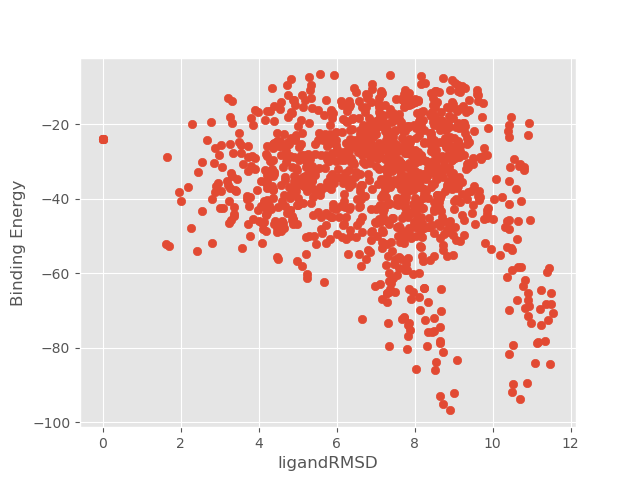

In [78]:
Image( "lig_set/CHEMBL209794/LIG_Pele/results/plots/ligandRMSD_Binding_Energy_plot.png", width=400)


# CHEMBL211794

## LigPrep Result

In [79]:
m = Chem.MolFromPDBFile("lig_set/CHEMBL211794/LIG_Pele/input/ligand.pdb")
_ = AllChem.EmbedMultipleConfs(m, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
view = nglview.show_rdkit(m)
view

RDKit WARNING: [11:15:11] Molecule does not have explicit Hs. Consider calling AddHs()
[11:15:11] Molecule does not have explicit Hs. Consider calling AddHs()
RDKit ERROR: [11:15:11] UFFTYPER: Unrecognized atom type: S_5+4 (21)
[11:15:11] UFFTYPER: Unrecognized atom type: S_5+4 (21)


NGLWidget()

In [81]:
view.render_image()


Image(value=b'', width='99%')

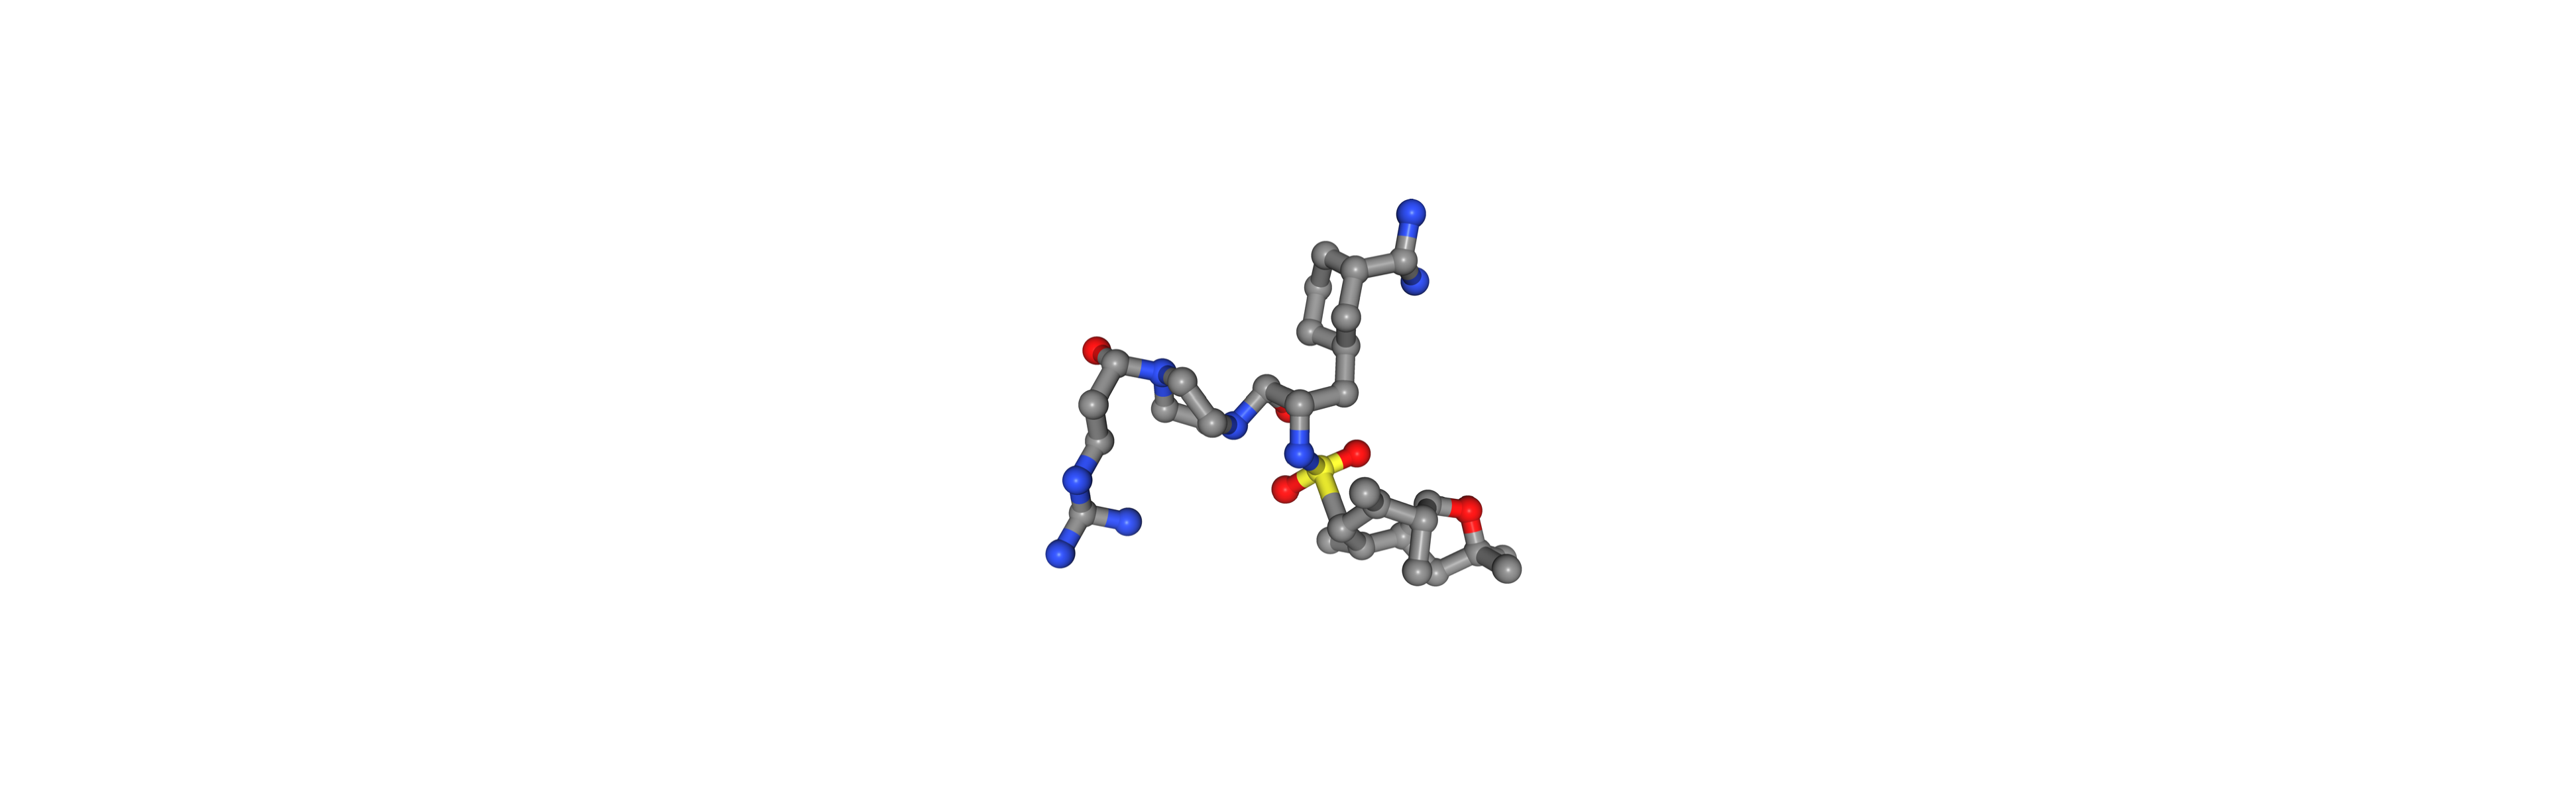

In [82]:
view._display_image()


# Glide Results

In [83]:
m = Chem.MolFromPDBFile("4_glide.pdb")
view = nglview.show_rdkit(m)
print("Result #1")
print("Docking Score: -5.494")
view

Result #1
Docking Score: -5.494


NGLWidget()

In [84]:
view.render_image()


Image(value=b'', width='99%')

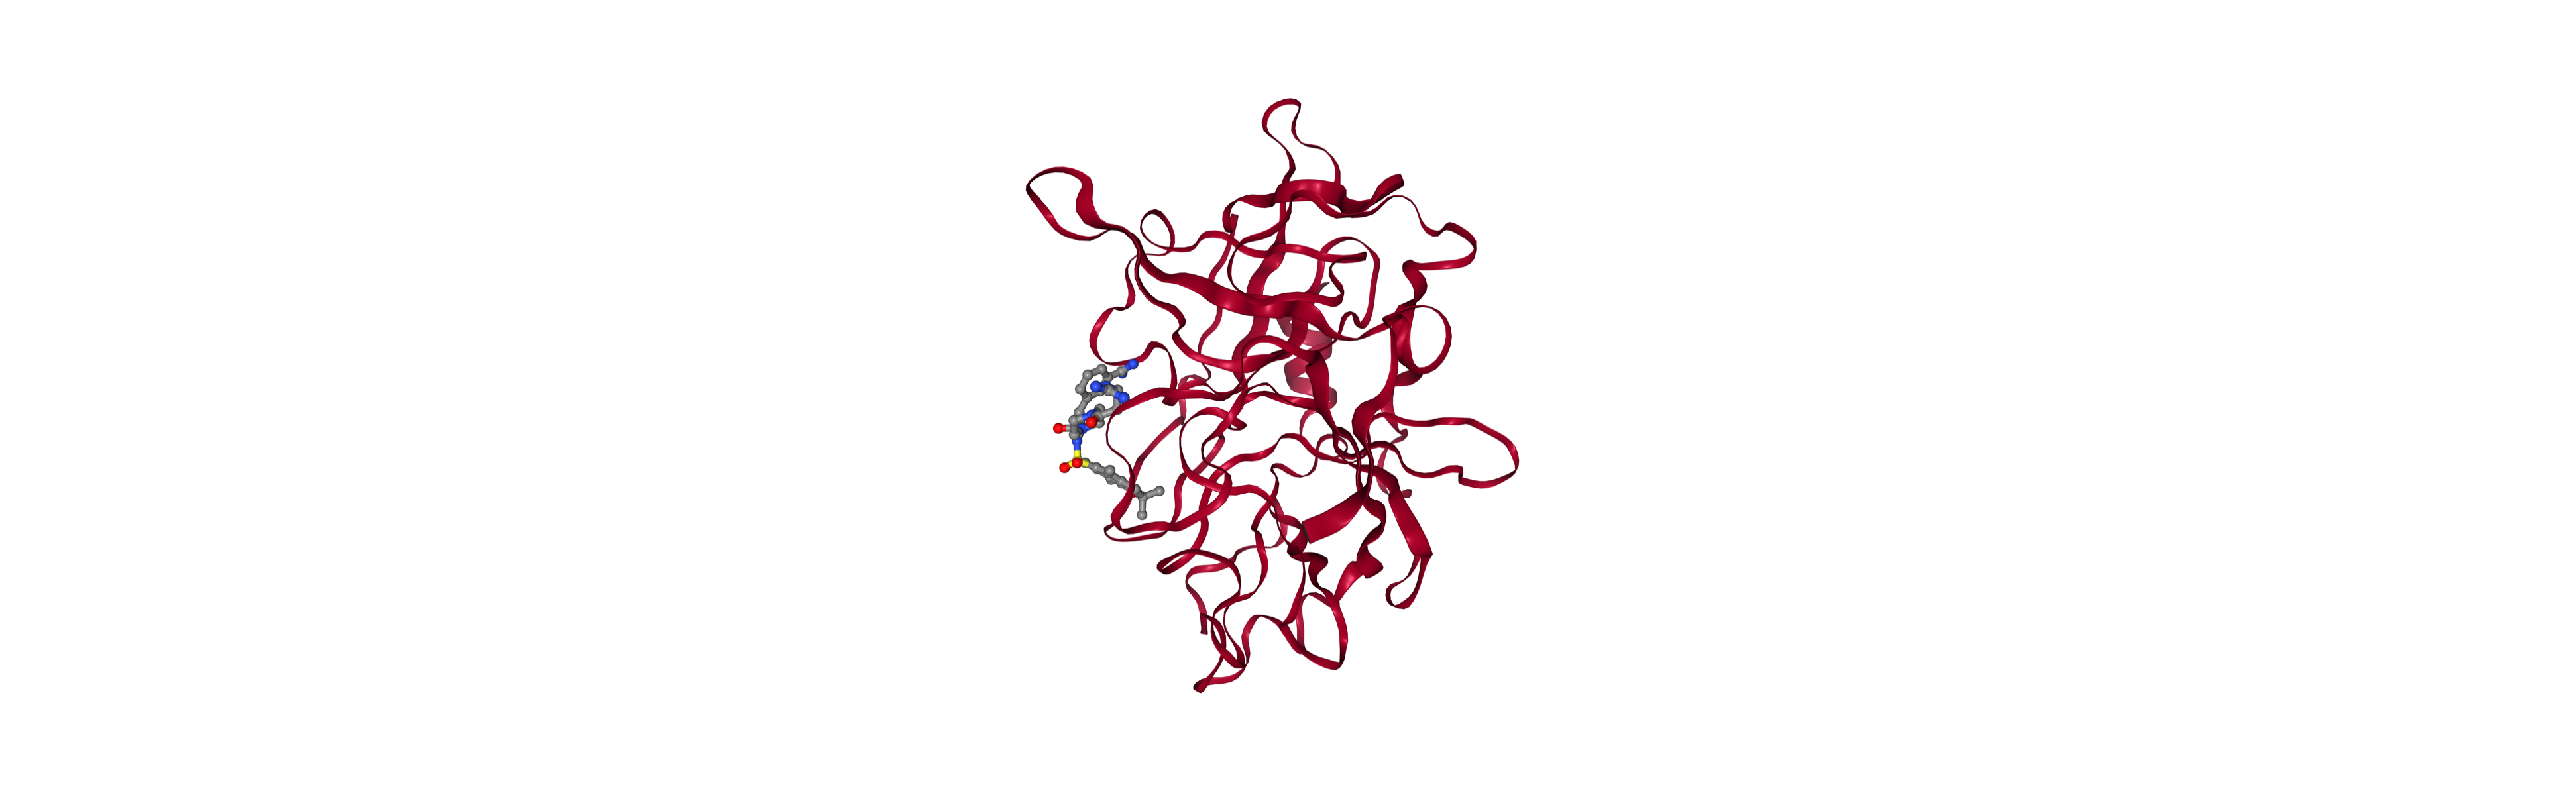

In [85]:
view._display_image()


In [86]:
m = Chem.MolFromPDBFile("5_glide.pdb")
view = nglview.show_rdkit(m)
print("Result #1")
print("Docking Score: -4.944")
view

Result #1
Docking Score: -4.944


NGLWidget()

In [87]:
view.render_image()


Image(value=b'', width='99%')

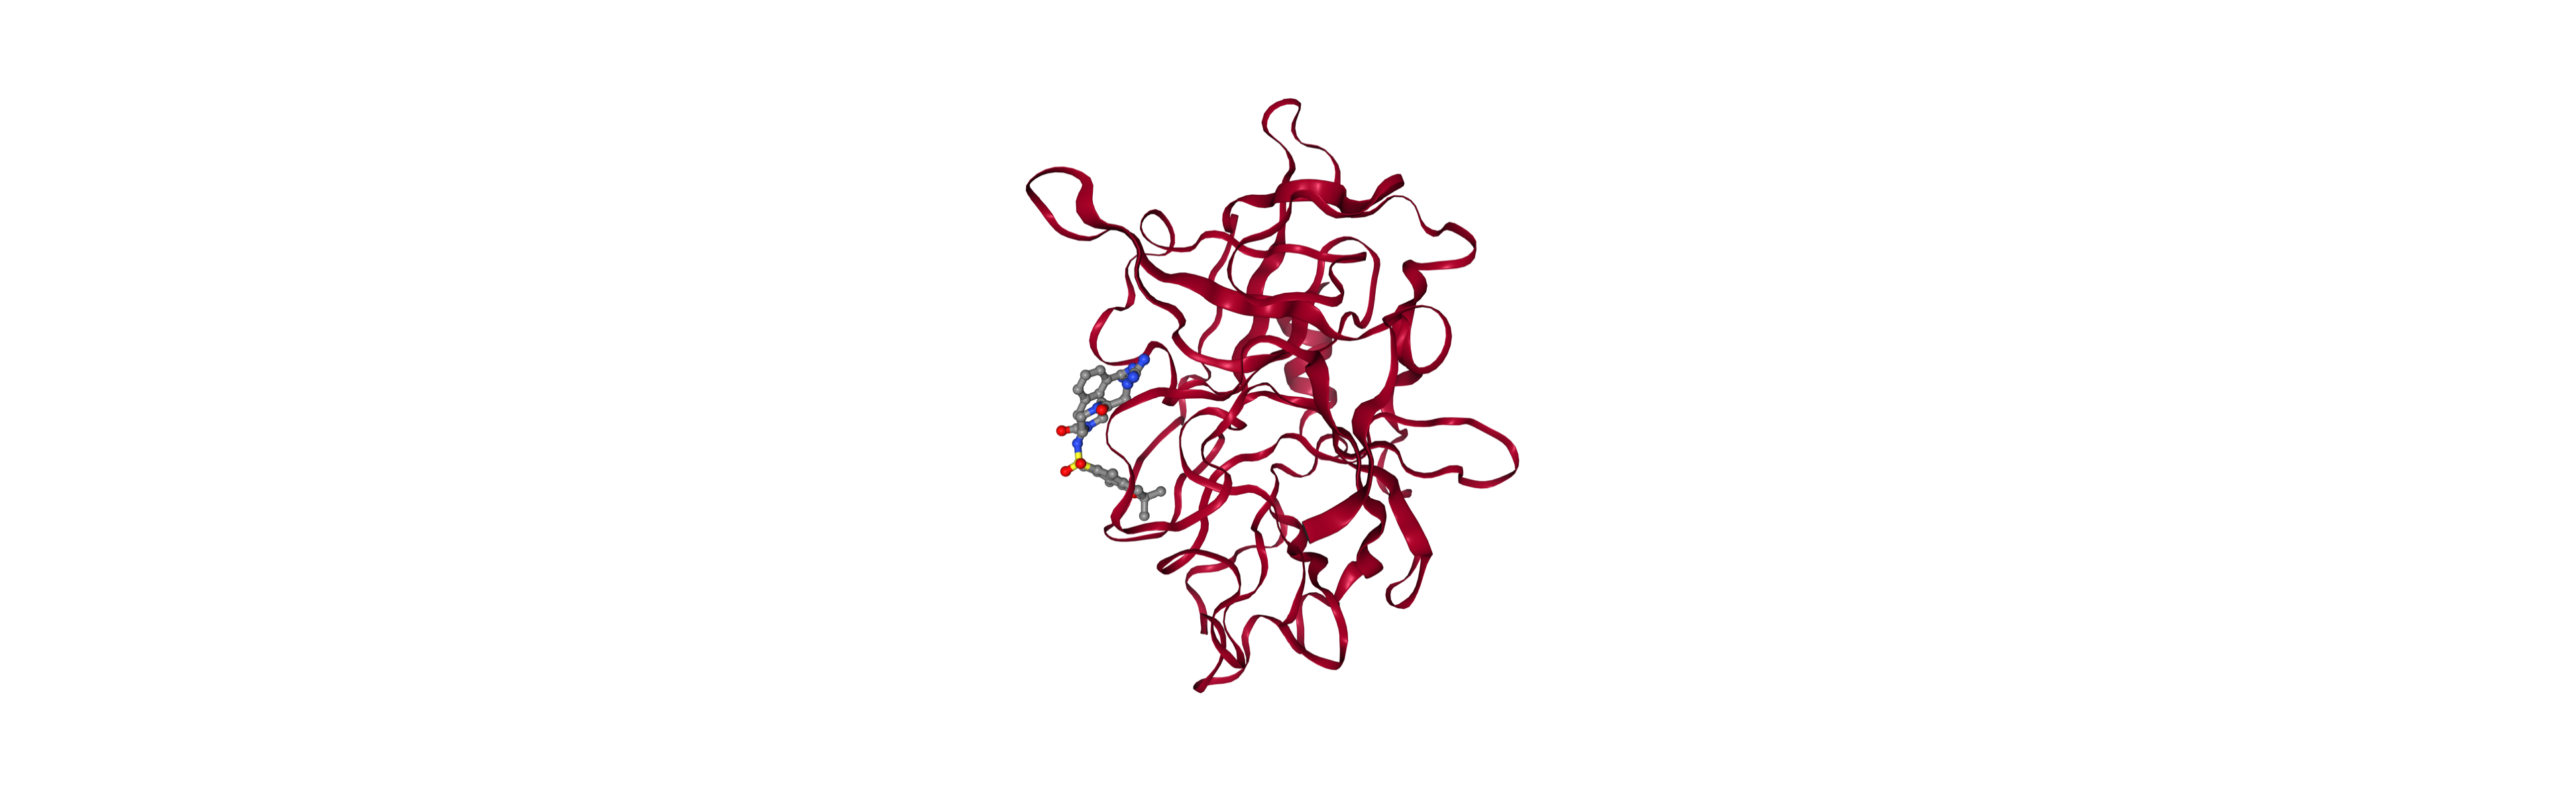

In [88]:
view._display_image()


In [89]:
m = Chem.MolFromPDBFile("6_glide.pdb")
view = nglview.show_rdkit(m)
print("Result #1")
print("Docking Score: -5.921")
view

Result #1
Docking Score: -5.921


NGLWidget()

In [90]:
view.render_image()


Image(value=b'', width='99%')

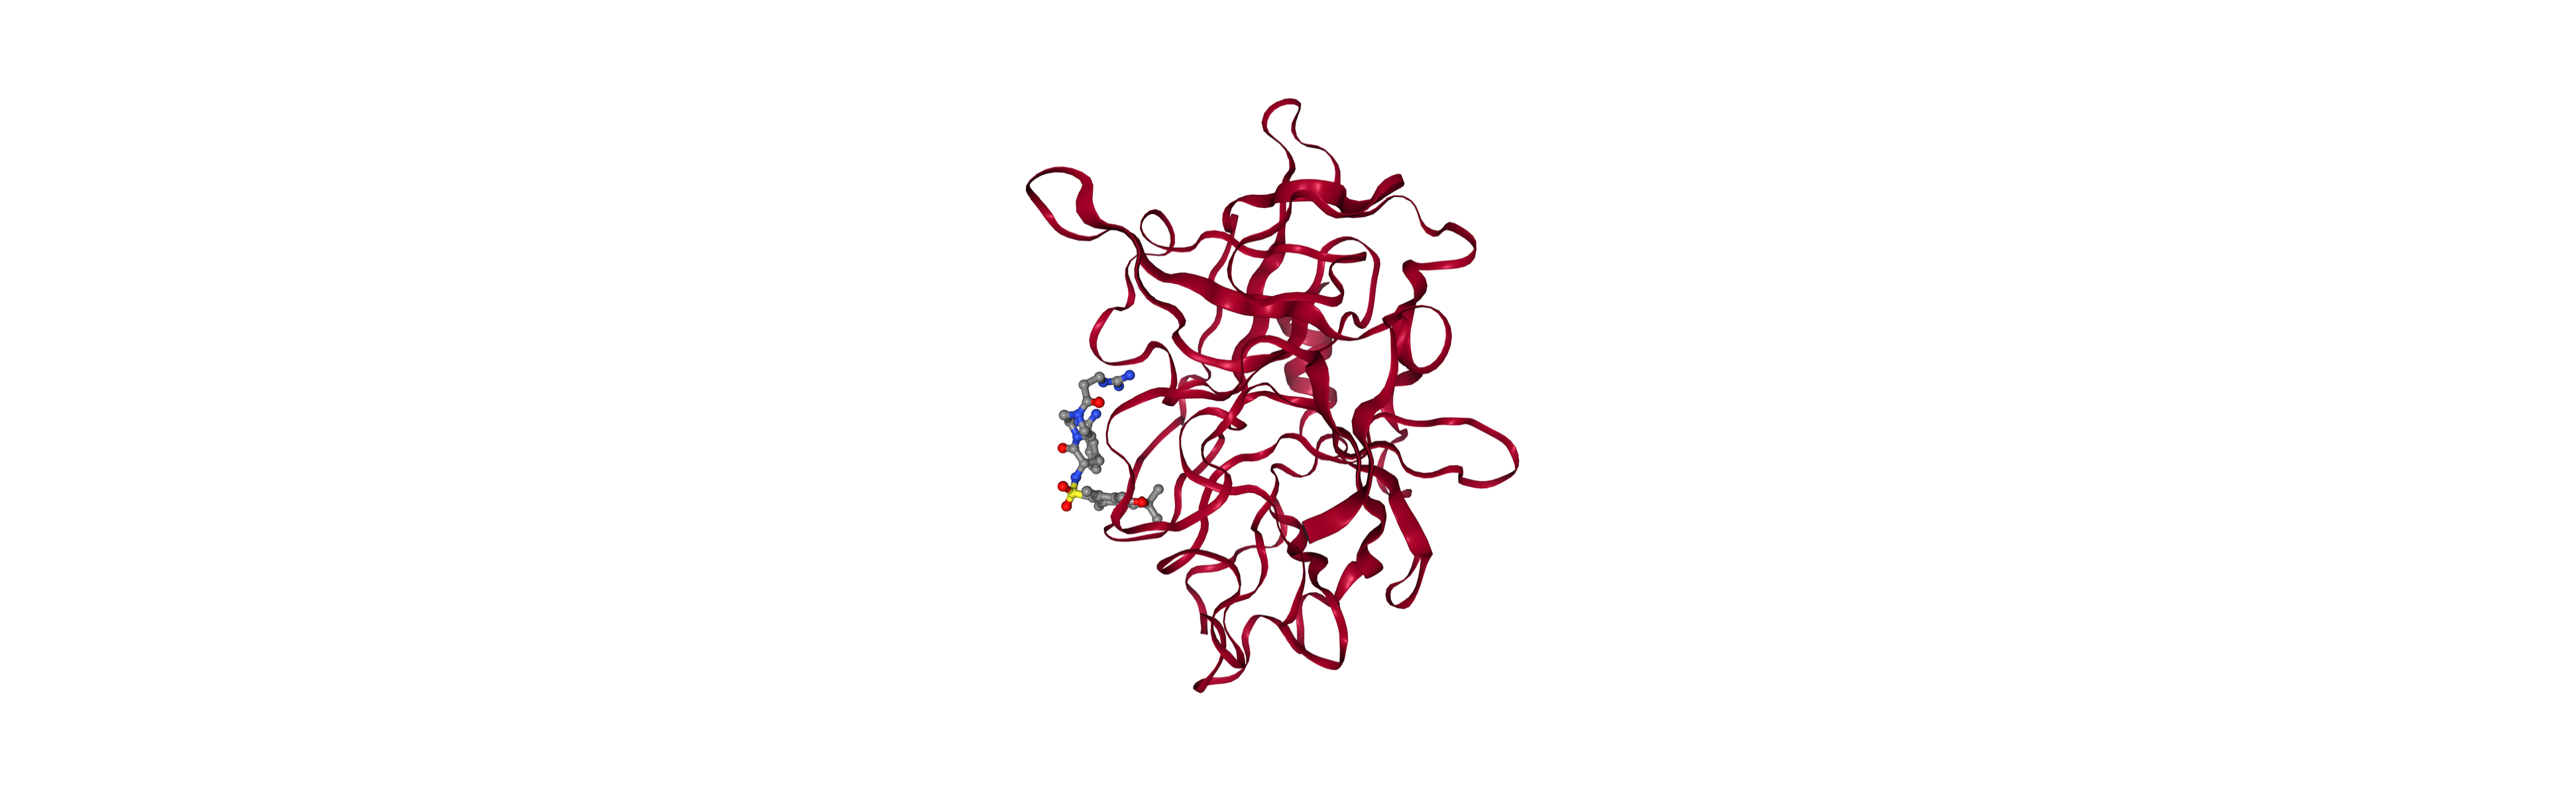

In [92]:
view._display_image()


## Simulation YAML

system: 'CHEMBL211794_top_glide.pdb' # Protein-ligand PDB \
rmsd_pdb: 'CHEMBL211794_top_glide.pdb' \
chain: 'Z' # Ligand chain ID \
resname: 'LIG' # Ligand residue name \
steps: 200 \
cpus: 40 \
induced_fit_exhaustive: true  # 6h simulation but a lot more sampling 

## RMSD Plot Results

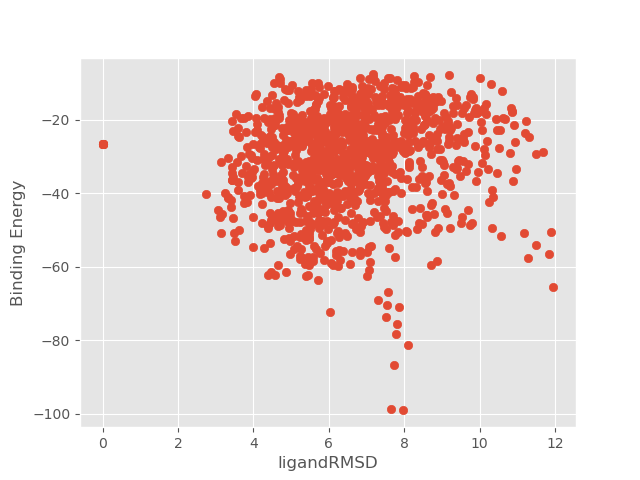

In [93]:
Image( "lig_set/CHEMBL211794/LIG_Pele/results/plots/ligandRMSD_Binding_Energy_plot.png", width=400)


# CHEMBL3706846

# LigPrep Result

In [94]:
m = Chem.MolFromPDBFile("lig_set/CHEMBL3706846/LIG_Pele/input/ligand.pdb")
_ = AllChem.EmbedMultipleConfs(m, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
view = nglview.show_rdkit(m)
view

[11:15:43] Molecule does not have explicit Hs. Consider calling AddHs()
RDKit WARNING: [11:15:43] Molecule does not have explicit Hs. Consider calling AddHs()
[11:15:43] UFFTYPER: Unrecognized atom type: S_5+4 (20)
RDKit ERROR: [11:15:43] UFFTYPER: Unrecognized atom type: S_5+4 (20)


NGLWidget()

In [95]:
view.render_image()


Image(value=b'', width='99%')

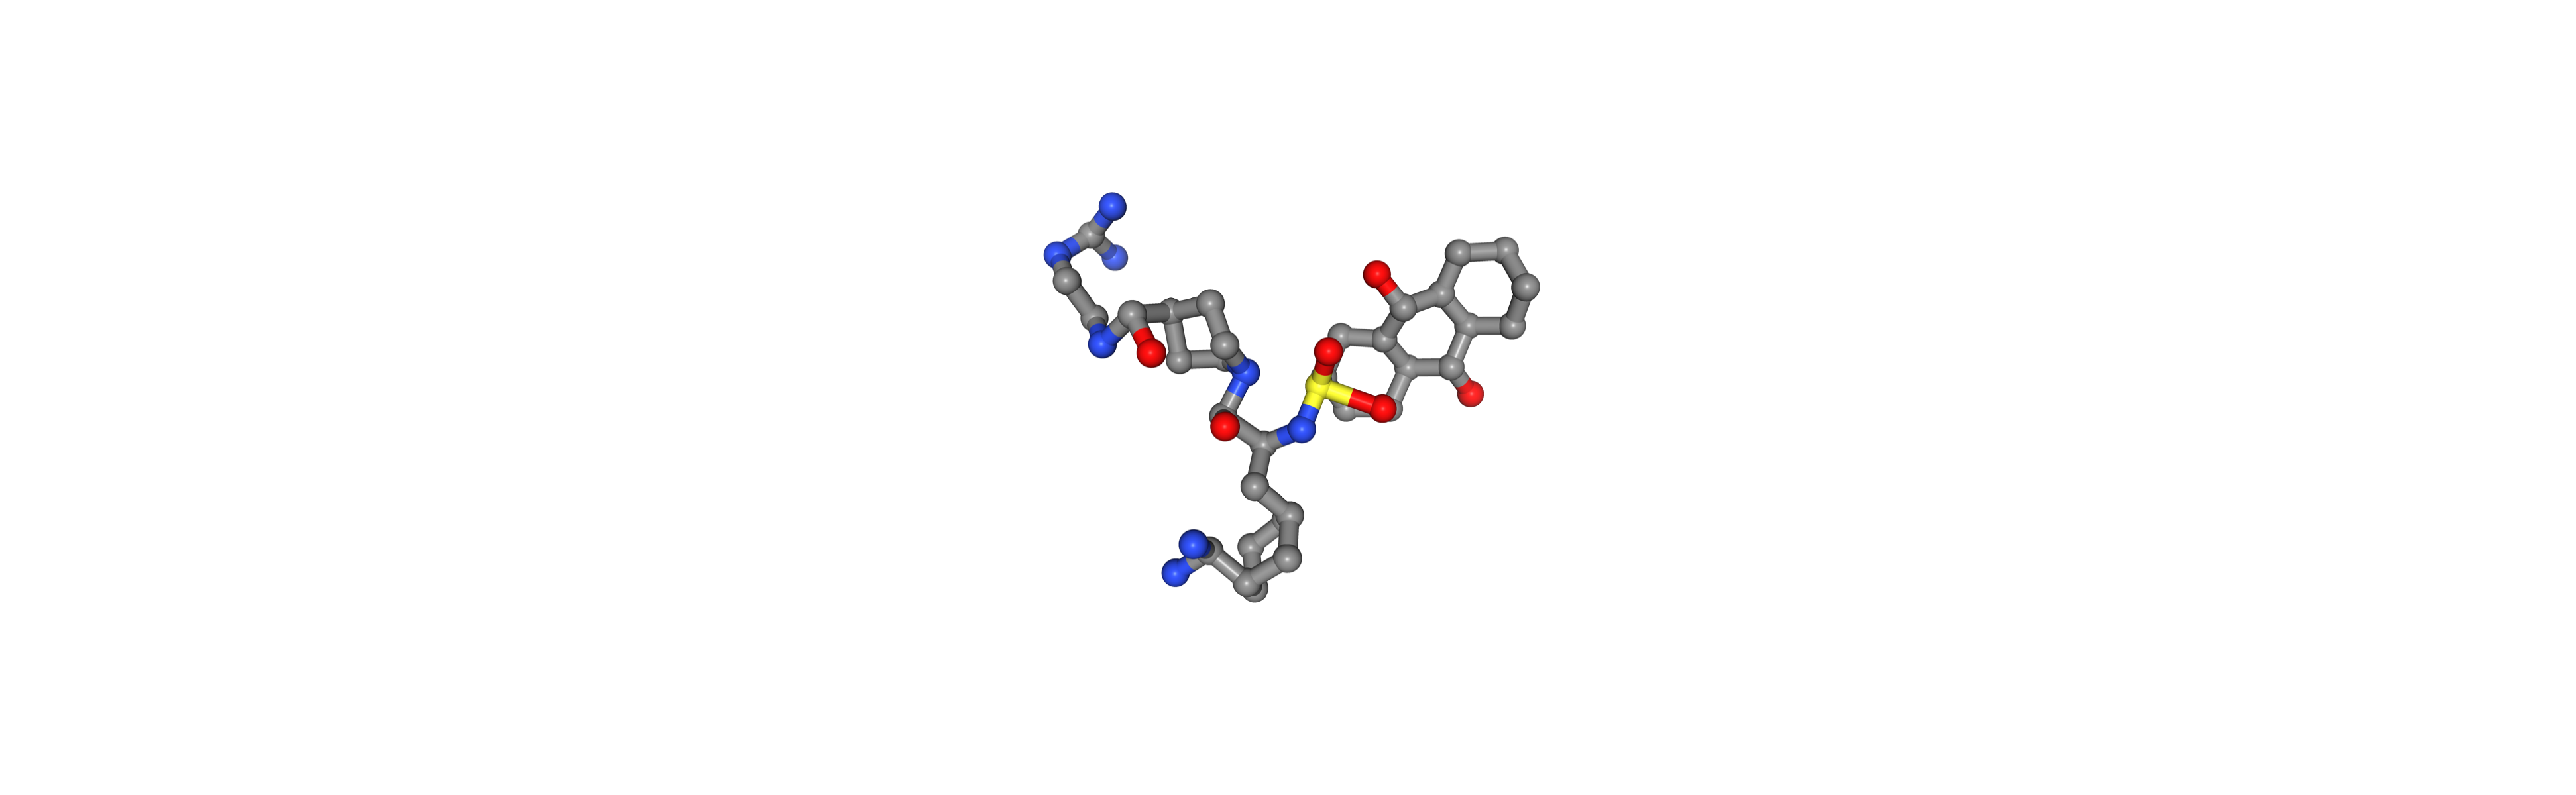

In [97]:
view._display_image()


# Glide Results

In [98]:
m = Chem.MolFromPDBFile("7_glide.pdb")
view = nglview.show_rdkit(m)
print("Result #1")
print("Docking Score: -5.385")
view

Result #1
Docking Score: -5.385


NGLWidget()

In [99]:
view.render_image()


Image(value=b'', width='99%')

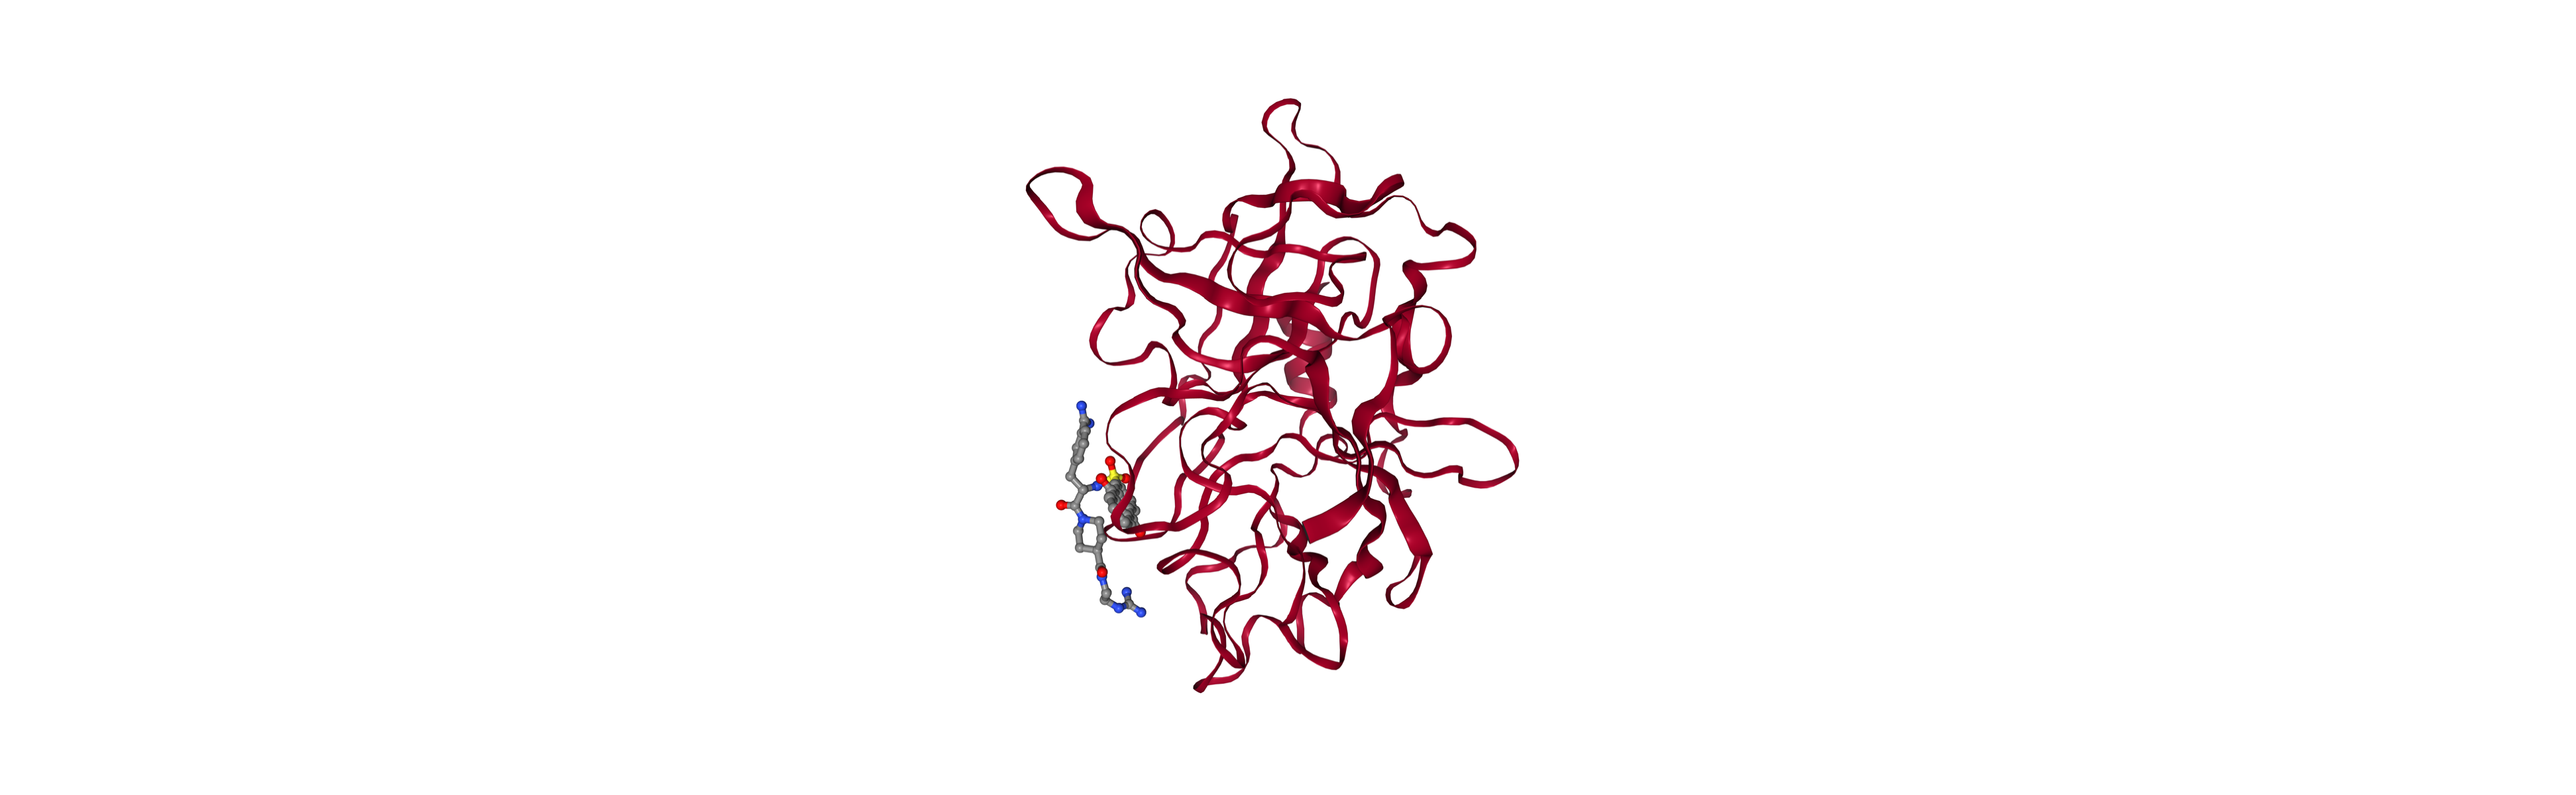

In [100]:
view._display_image()


In [101]:
m = Chem.MolFromPDBFile("8_glide.pdb")
view = nglview.show_rdkit(m)
print("Result #1")
print("Docking Score: -4.608")
view

Result #1
Docking Score: -4.608


NGLWidget()

In [102]:
view.render_image()


Image(value=b'', width='99%')

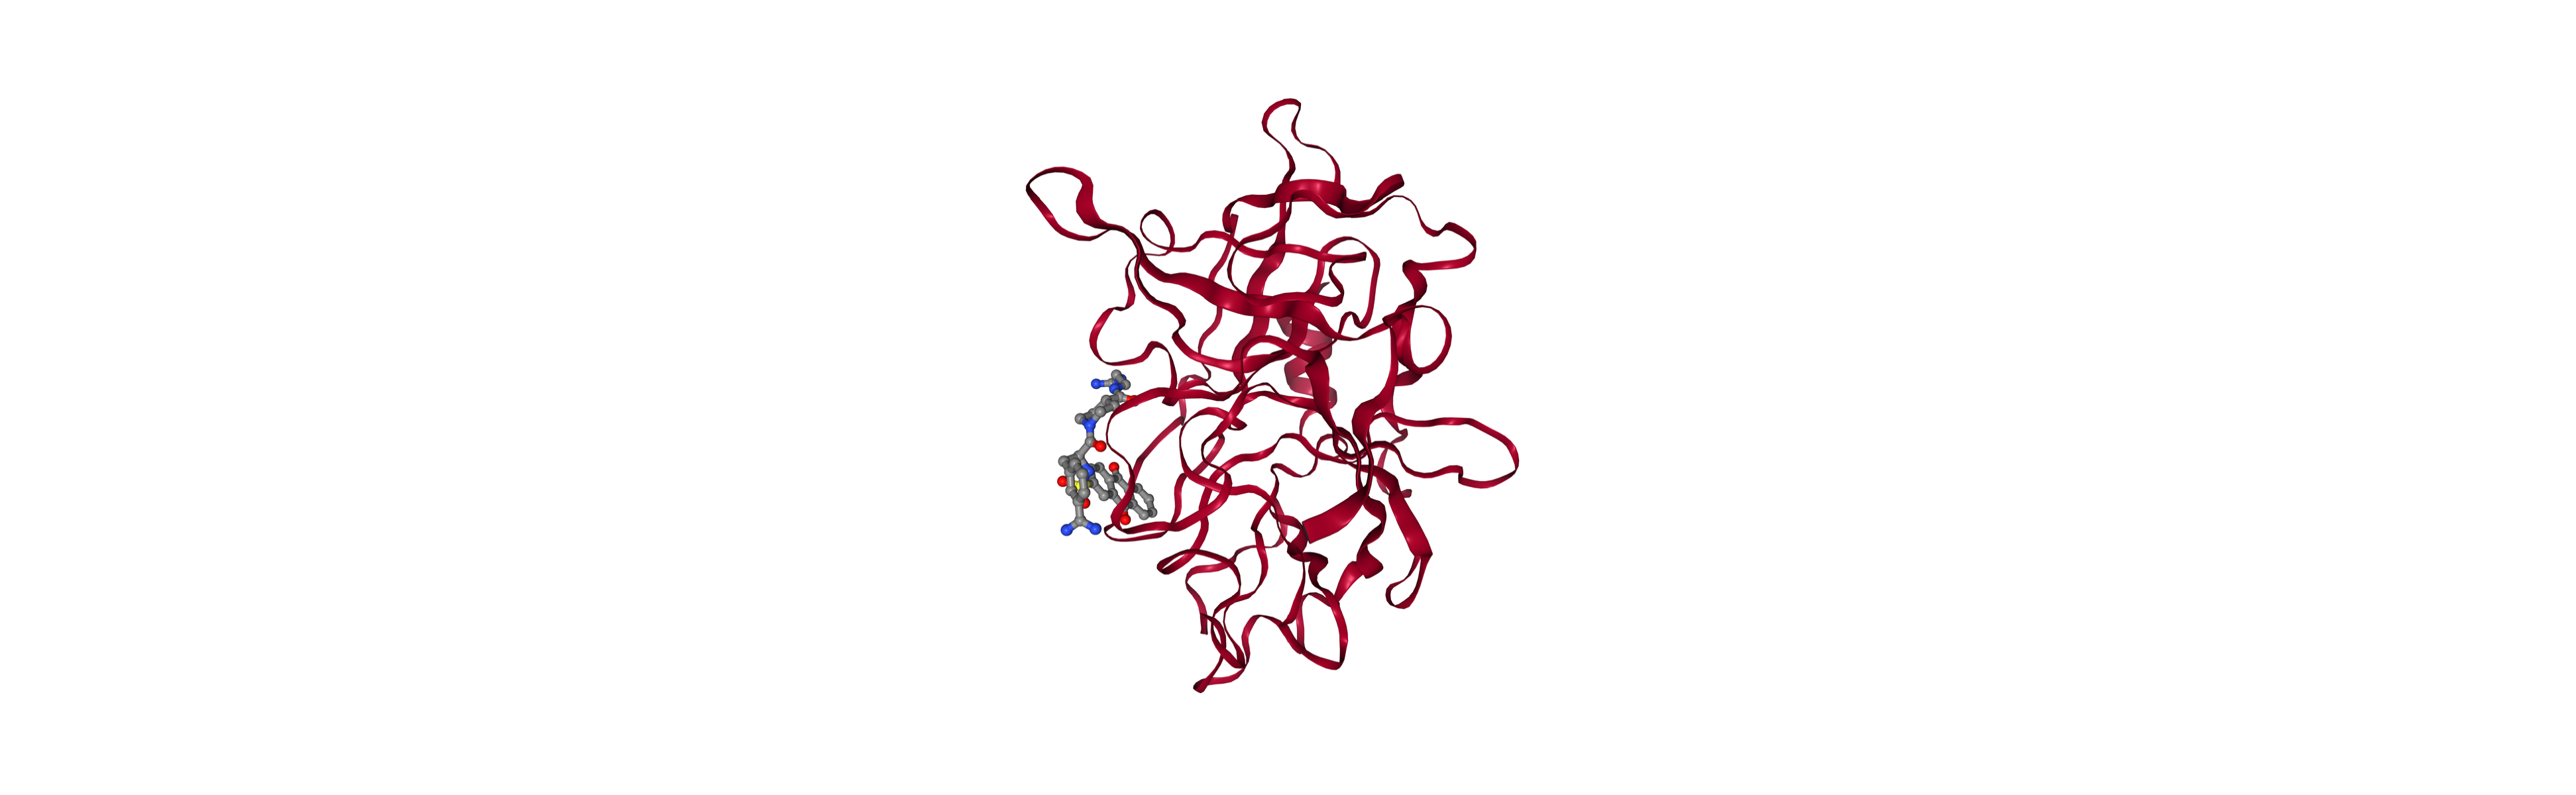

In [103]:
view._display_image()


In [104]:
m = Chem.MolFromPDBFile("9_glide.pdb")
view = nglview.show_rdkit(m)
print("Result #1")
print("Docking Score: -4.111")
view

Result #1
Docking Score: -4.111


NGLWidget()

In [105]:
view.render_image()


Image(value=b'', width='99%')

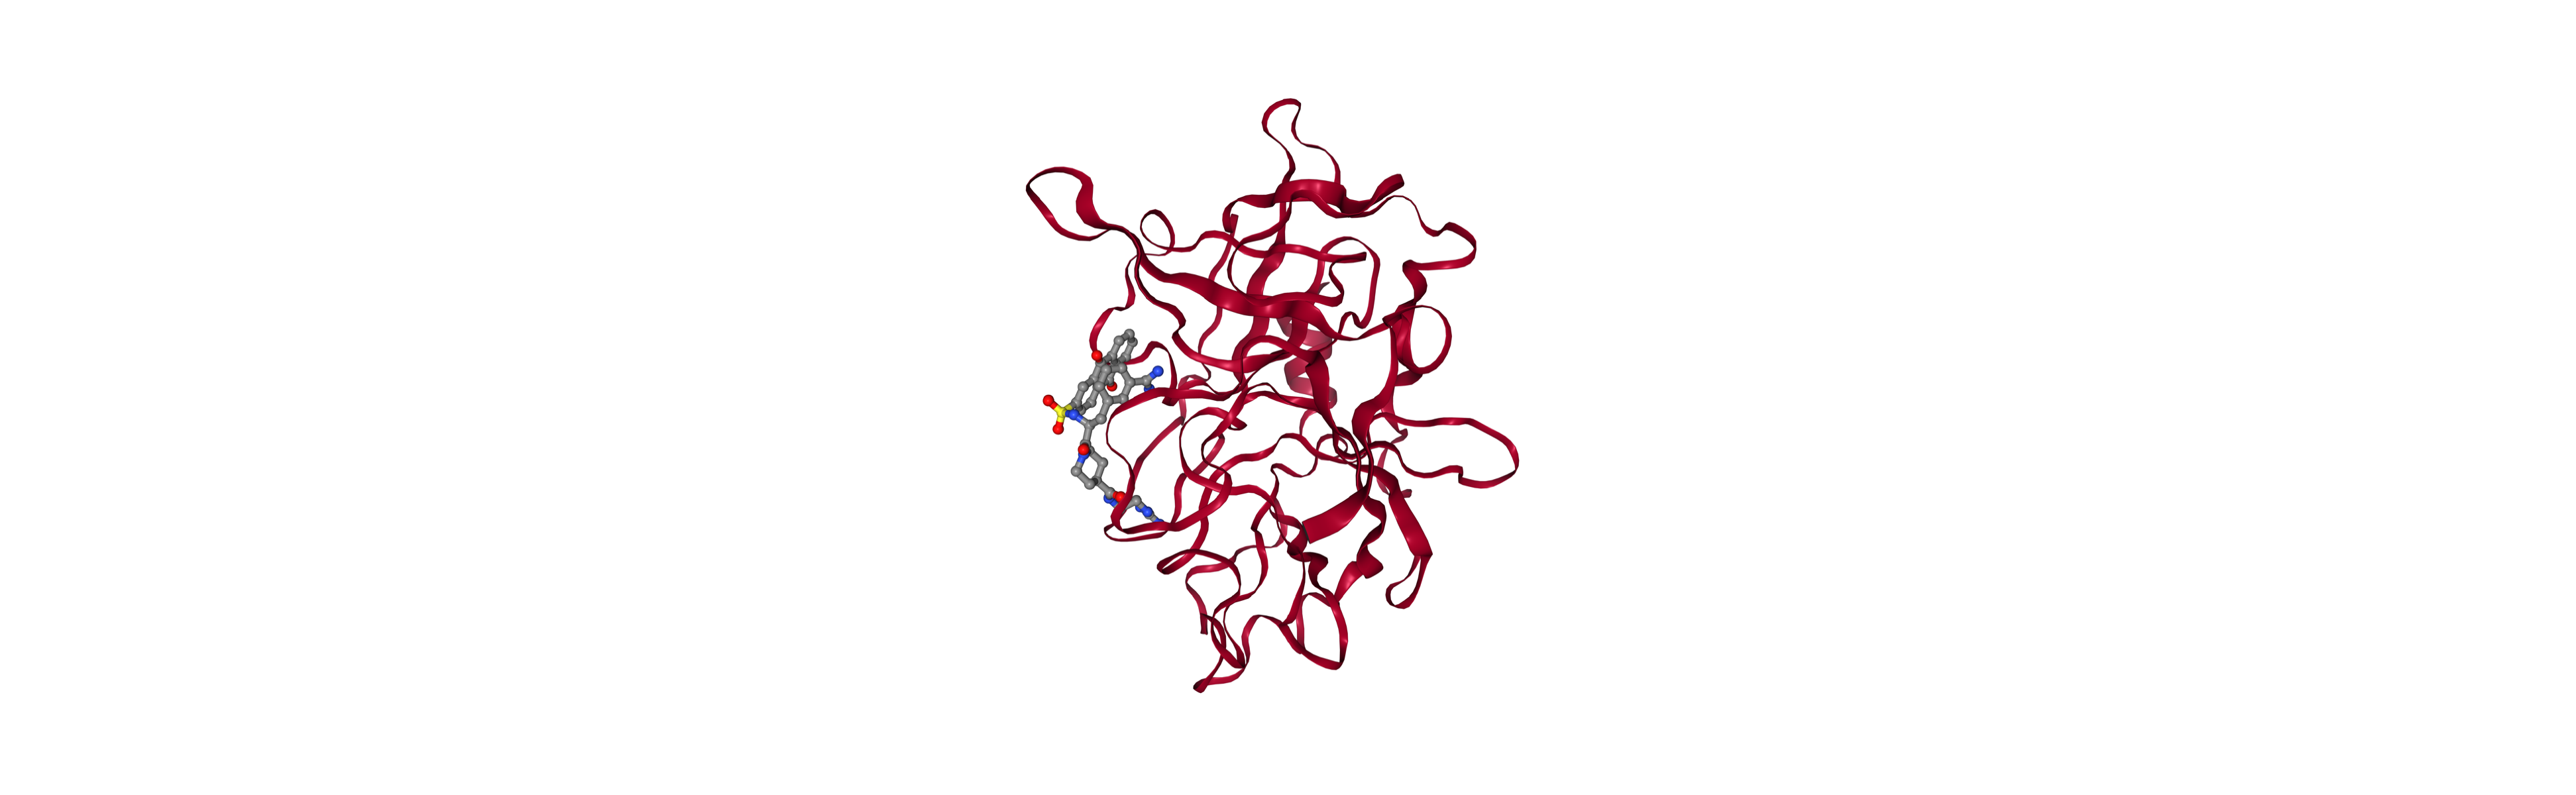

In [106]:
view._display_image()


## Simulation YAML

system: 'CHEMBL3706846_top_glide.pdb' # Protein-ligand PDB \
rmsd_pdb: 'CHEMBL3706846_top_glide.pdb' \
chain: 'Z' # Ligand chain ID \
resname: 'LIG' # Ligand residue name \
steps: 200 \
cpus: 40 \
induced_fit_exhaustive: true  # 6h simulation but a lot more sampling 

## RMSD Plot Results

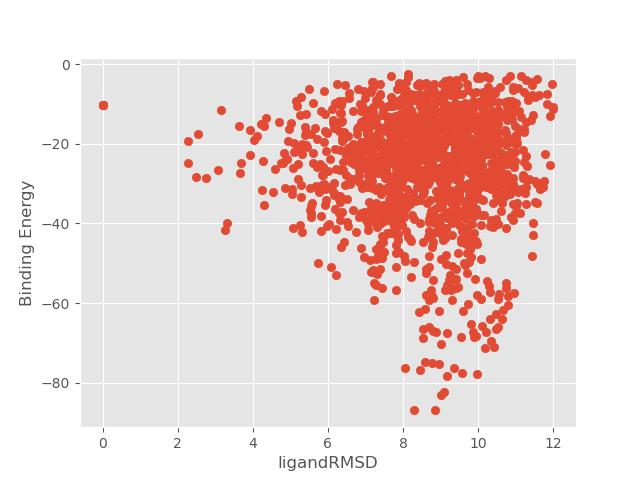

In [107]:
Image( "lig_set/CHEMBL3706846/LIG_Pele/results/plots/ligandRMSD_Binding_Energy_plot.png", width=400)
